In [24]:
import os

import  numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from mnist_datasets import MNISTLoader

In [25]:
import os
print(os.listdir())

['.git', '.idea', '.venv', '1_Perceptron.ipynb', 'ai.png', 'ai2.png', 'BNK.ipynb', 'cardio_train.csv', 'GPT.ipynb', 'he.png', 'he2.jpg', 'heart.ipynb', 'How John McCarthy Sh.png', 'Image Processing.ipynb', 'main.py', 'MNISCNN.ipynb', 'mnist.npz', 'README.md', 'testing.csv', 'TFkerasMINST.ipynb', 'training.csv', '__pycache__']


In [26]:
data = np.load("mnist.npz")
print(data.files)

['x_test', 'x_train', 'y_train', 'y_test']


In [27]:
x_train = data['x_train']
y_train = data['y_train']
x_test  = data['x_test']
y_test  = data['y_test']

In [28]:
np.shape(x_train)

(60000, 28, 28)

In [29]:
x_train=x_train/255
x_test=x_test/255


In [30]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
x_train=np.expand_dims(x_train,axis=3)

In [32]:
np.shape(x_train)

(60000, 28, 28, 1)

In [33]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [34]:
x_test=np.expand_dims(x_test,axis=3)

In [44]:
model=Sequential([
        ZeroPadding2D(padding=(1,1),input_shape=(28,28,1)),
    Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=(2, 2)),
    ZeroPadding2D(padding=(1,1)),
     Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax"),
])

In [45]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d_8                │ (None, 30, 30, 1)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_9                │ (None, 17, 17, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile("adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [47]:
y_train_o=to_categorical(y_train)
y_test_o=to_categorical(y_test)

In [48]:
y_train_o[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [49]:
history=model.fit(x_train,y_train_o,epochs=10,batch_size=300,validation_data=(x_test,y_test_o))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9168 - loss: 0.2864 - val_accuracy: 0.9780 - val_loss: 0.0710
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9793 - loss: 0.0674 - val_accuracy: 0.9850 - val_loss: 0.0449
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9860 - loss: 0.0469 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9885 - val_loss: 0.0349
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9884 - val_loss: 0.0320
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9929 - loss: 0.0227 - val_accuracy: 0.9909 - val_loss: 0.0294
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9942 - loss: 0.0194 - val_accuracy: 0.9891 - val_loss: 0.0302
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9952 - loss: 0.0153 - val_accu

In [50]:
history

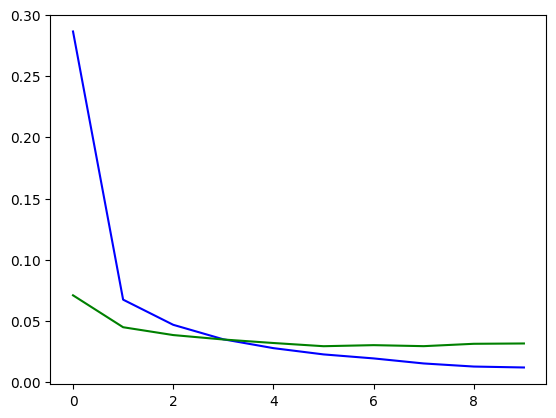

In [51]:
import  matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue',label="train data")
plt.plot(history.history['val_loss'],color='green',label="validation data")

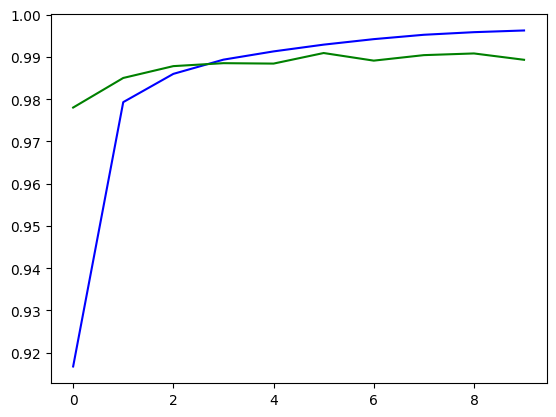

In [52]:
import  matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='blue',label="train data")
plt.plot(history.history['val_accuracy'],color='green',label="validation data")